#### 서울시 CCTV 현황 분석 및 인구 현황 분석

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')           

#### CCTV 설치현황

In [2]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [4]:
CCTV_Seoul.info()

<class 'pandas.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     str    
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), str(1)
memory usage: 2.1 KB


In [5]:
CCTV_Seoul.sort_values('소계',ascending=False)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
14,서초구,2835,1172.0,91.0,228.0,134,215,352,247,396
18,양천구,2775,772.0,161.0,185.0,169,172,349,137,830
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194


In [6]:
CCTV_Seoul.rename(
    columns={'기관명':'구별'},
    inplace=True
    )
CCTV_Seoul.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [7]:
CCTV_Seoul[CCTV_Seoul['2011년 이전'].isnull()]

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
10,동대문구,2003,NaN,NaN,NaN,1326,111,233,136,197
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [8]:
# NaN을 0으로 변환하기
CCTV_Seoul.fillna(0, inplace=True)
CCTV_Seoul.tail()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9


In [9]:
CCTV_Seoul.info()

<class 'pandas.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        25 non-null     str    
 1   소계        25 non-null     int64  
 2   2011년 이전  25 non-null     float64
 3   2012년     25 non-null     float64
 4   2013년     25 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), str(1)
memory usage: 2.1 KB


---
#### 인구현황

In [10]:
pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx", header=3, usecols="B,D,G,J,N")
pop_seoul.columns = ['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989
6,동대문구,362793,346156,16637,60367
7,중랑구,400678,395619,5059,66764
8,성북구,454532,442494,12038,72172
9,강북구,316750,312985,3765,61660


In [11]:
# 합계 행 삭제
pop_seoul.drop(
    0,
    axis = 'rows',
    inplace=True
)


In [12]:
pop_seoul.reset_index(drop=True, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989


In [13]:
pop_seoul.info()

<class 'pandas.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   구별      25 non-null     str  
 1   인구수     25 non-null     int64
 2   한국인     25 non-null     int64
 3   외국인     25 non-null     int64
 4   고령자     25 non-null     int64
dtypes: int64(4), str(1)
memory usage: 1.1 KB


---
### CCTV 현황
#### 3년간 CCTV 증가율을 구해서 CCTV가 제일 많이 증가한 구를 검색

In [14]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [15]:
CCTV_Seoul['최근증가율'] = \
    CCTV_Seoul.loc[:,'2016년':].sum(axis='columns') / CCTV_Seoul.loc[:,'2011년 이전':'2015년'].sum(axis='columns') * 100
CCTV_Seoul.sort_values(
    by = '최근증가율',
    ascending=False
).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


---
#### 인구현황

In [16]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,종로구,161984,151217,10767,28073
1,중구,136469,126175,10294,23794
2,용산구,246165,229579,16586,39439
3,성동구,307193,299042,8151,44728
4,광진구,365990,350417,15573,48989


In [17]:
pop_seoul['외국인 비율'] = (pop_seoul['외국인'] / pop_seoul['인구수']) * 100
pop_seoul['고령자 비율'] = (pop_seoul['고령자'] / pop_seoul['인구수']) * 100
# == 
# pop_seoul.loc[:,['외국인 비율', '고령자 비율']] = pop_seoul[['외국인','고령자']].div(pop_seoul['인구수'], axis = 0) * 100




In [18]:
# 인구수 정렬
pop_seoul.sort_values(by ='인구수', ascending=False).tail()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
3,성동구,307193,299042,8151,44728,2.653381,14.560228
17,금천구,251370,232583,18787,38508,7.473843,15.319251
2,용산구,246165,229579,16586,39439,6.737757,16.021368
0,종로구,161984,151217,10767,28073,6.646953,17.330724
1,중구,136469,126175,10294,23794,7.543105,17.435462


In [19]:
# 외국인 정렬
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
18,영등포구,404766,371903,32863,59373,8.119012,14.668475
16,구로구,438308,405837,32471,67432,7.408261,15.384615
17,금천구,251370,232583,18787,38508,7.473843,15.319251
20,관악구,516662,499374,17288,76664,3.346095,14.838328
5,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [20]:
# pop_seoul.sort_values(by='외국인 비율', ascending=False)

In [21]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
23,송파구,680883,674095,6788,89539,0.996941,13.150424
15,강서구,595703,589302,6401,85992,1.074529,14.435381
10,노원구,535495,531037,4458,82682,0.832501,15.440294
11,은평구,482509,478019,4490,82245,0.930553,17.045278
20,관악구,516662,499374,17288,76664,3.346095,14.838328


In [22]:
pop_seoul.sort_values(by='고령자 비율', ascending=False)


,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
8,강북구,316750,312985,3765,61660,1.188635,19.466456
9,도봉구,333495,331238,2257,60023,0.676772,17.998171
1,중구,136469,126175,10294,23794,7.543105,17.435462
0,종로구,161984,151217,10767,28073,6.646953,17.330724
11,은평구,482509,478019,4490,82245,0.930553,17.045278
6,중랑구,400678,395619,5059,66764,1.262610,16.662757
5,동대문구,362793,346156,16637,60367,4.585811,16.639516
12,서대문구,325875,312642,13233,53038,4.060759,16.275566
2,용산구,246165,229579,16586,39439,6.737757,16.021368
7,성북구,454532,442494,12038,72172,2.648438,15.878310


> 정리             
인구수가 제일 많은 지역은 송파구 이지만, 영등포구가 외국인이 제일 많다.             
그리고 그 근처라고 할 수 있는 구로구, 금천구도 외국인이 많다.                
송파구는 고령자가 제일 많지만, 고령자 비율이 높지 않는것으로 확인된다.         
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는 인구수 대비 고령자 비율이 높기 때문에              
추후 고령화가 우려된다.

---
#### CCTV와 인구현황 합치기

In [23]:
data_result = \
    pd.merge(
        CCTV_Seoul,
        pop_seoul,
        on = '구별'
    )
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [24]:
# 년도별 CCTV 컬럼 삭제
data_drop = \
    data_result.drop(
        data_result.iloc[:,2:10],
        axis='columns'
    )


# ==
for i in data_result.columns[2:9+1]:
    del data_result[i]
data_result.head()


,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [25]:
data_drop.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [26]:
data_drop.set_index('구별', inplace=True)
data_drop.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [27]:
# 상관계수로 고령자수 소계
data_drop[['소계', '고령자']].corr()

,소계,고령자
소계,1.000000,0.286385
고령자,0.286385,1.000000


In [28]:
data_drop[['소계', '한국인']].corr()

,소계,한국인
소계,1.000000,0.364536
한국인,0.364536,1.000000


In [29]:
data_drop[['소계', '외국인']].corr()

,소계,외국인
소계,1.000000,0.174442
외국인,0.174442,1.000000


In [30]:
import numpy as np

In [31]:
np.corrcoef(data_result['고령자 비율'], data_result['소계'])


array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [32]:
# 상관계수로 외국인 비율과 소계
np.corrcoef(data_result['외국인 비율'], data_result.소계)

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [33]:
# 상관계수로 인구수와 소계
np.corrcoef(data_result.인구수, data_result.소계)

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

In [34]:
# 상관계수로 한국인과 소계
np.corrcoef(data_result.한국인, data_result['소계'])
# 


array([[1.        , 0.36453609],
       [0.36453609, 1.        ]])

> 고령자비율, 외국인비율, 인구수등을 비교해 보았을때 고령자비율과는 음의 상관관계가 발생하고 인구수는 양의 산관관계가 발생한다.

In [35]:
# CCTV소계의 내림차순
data_result.sort_values(
    by='소계',
    ascending=False,
).head().set_index('구별')

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328
구로구,3227,72.106667,438308,405837,32471,67432,7.408261,15.384615
성북구,3003,78.008299,454532,442494,12038,72172,2.648438,15.878310
은평구,2962,43.091787,482509,478019,4490,82245,0.930553,17.045278


In [36]:
# 인구수의 내림차순
data_result.sort_values(
    by='인구수',
    ascending=False,
).head().set_index('구별')
data_result.set_index(
    '구별',
    inplace=True
)

In [37]:
# 정리된 데이터 저장하기
data_result.to_csv("../Data/CCTV_result.csv")  # 파일은 index 가 없어서 index 가 컬럼으로 올라감.

---
### 차트를 활용

In [38]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

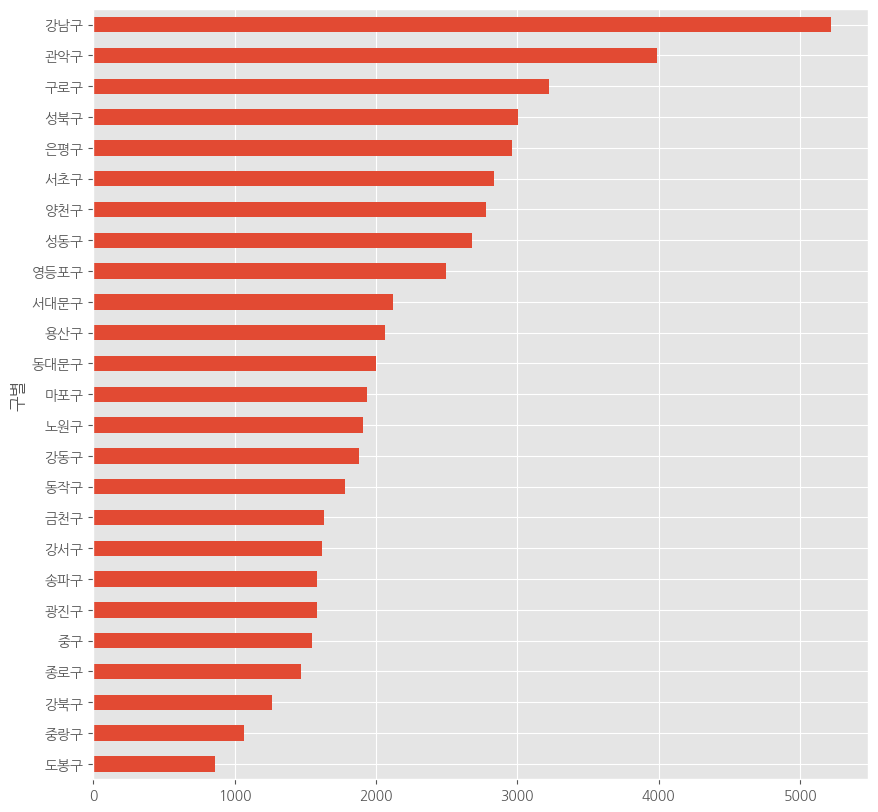

In [39]:
# 막대그래프

plt.style.use('ggplot')

data_result.소계.sort_values().plot(
    kind = 'barh',
    figsize=(10,10)
)

plt.show()


> CCTV댓수는 강남구가 월등하게 많은것으로 확인

---
#### 인구대비 CCTV 비율
: CCTV 비율 = 소계 / 인구수 * 100

In [40]:
data_result.head()
data_result['CCTV 비율'] = data_result['소계']/data_result['인구수'] * 100

In [41]:
data_result = data_result.sort_values('CCTV 비율', ascending=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.266548
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444
노원구,1906,42.026826,535495,531037,4458,82682,0.832501,15.440294,0.355932


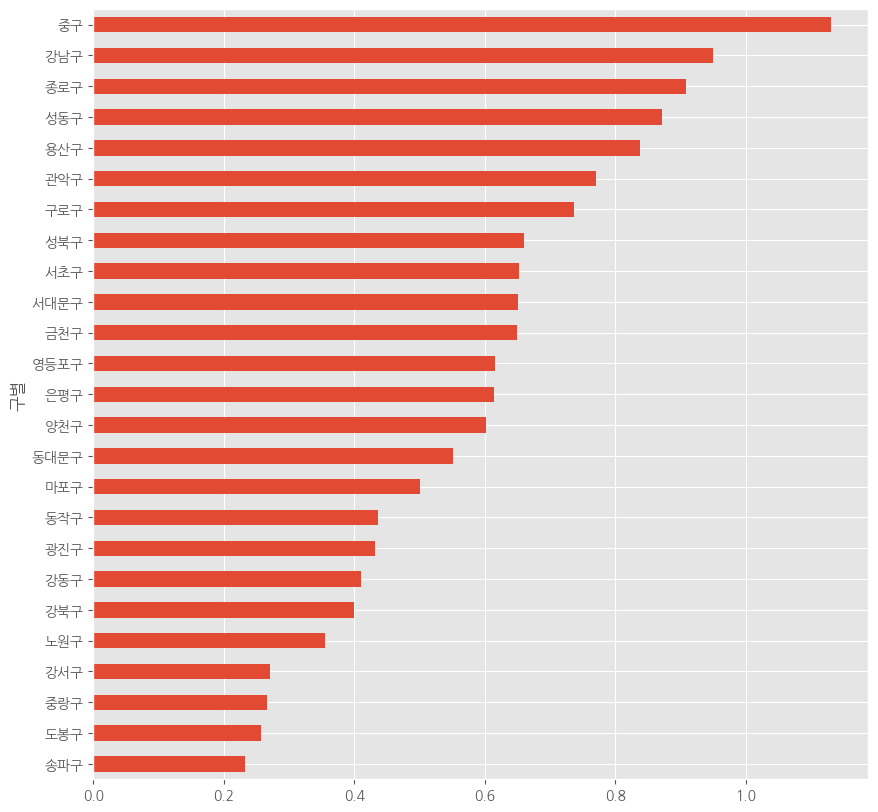

In [42]:
data_result['CCTV 비율'].plot(
    kind = 'barh',
    figsize=(10,10)
)

plt.show()

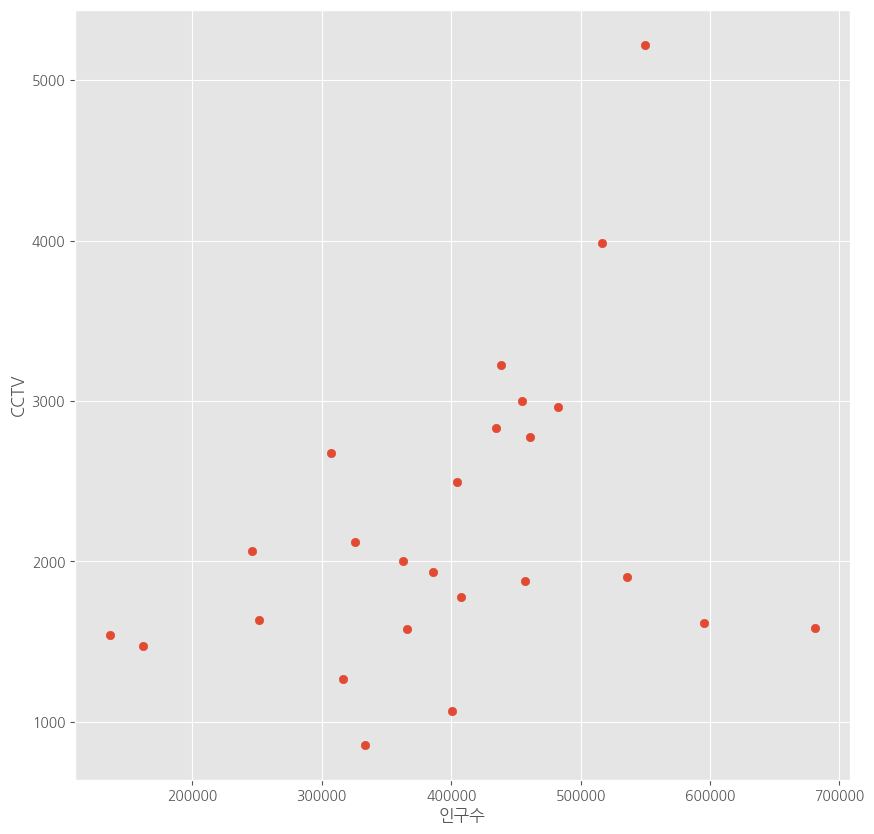

In [43]:
# 산점도를 이용한 시각화
plt.style.use('ggplot')

plt.figure(figsize = (10, 10))
plt.scatter(
    x = data_result.인구수,
    y = data_result.소계
)

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()



In [44]:
# 인구수, 소계에 따른 회귀선(평균선, 기준선) 만들기
# fit -> 학습
fp1 = np.polyfit(data_result.인구수, data_result.소계, 1)  # 1-> 직선으로 만들어라
fp1

array([2.88522756e-03, 1.06403852e+03])

In [45]:
# y축 데이터 만들기
f1 = np.poly1d(fp1)


# x축 만들기
fx =  np.linspace(100000,700000)
len(fx)



50

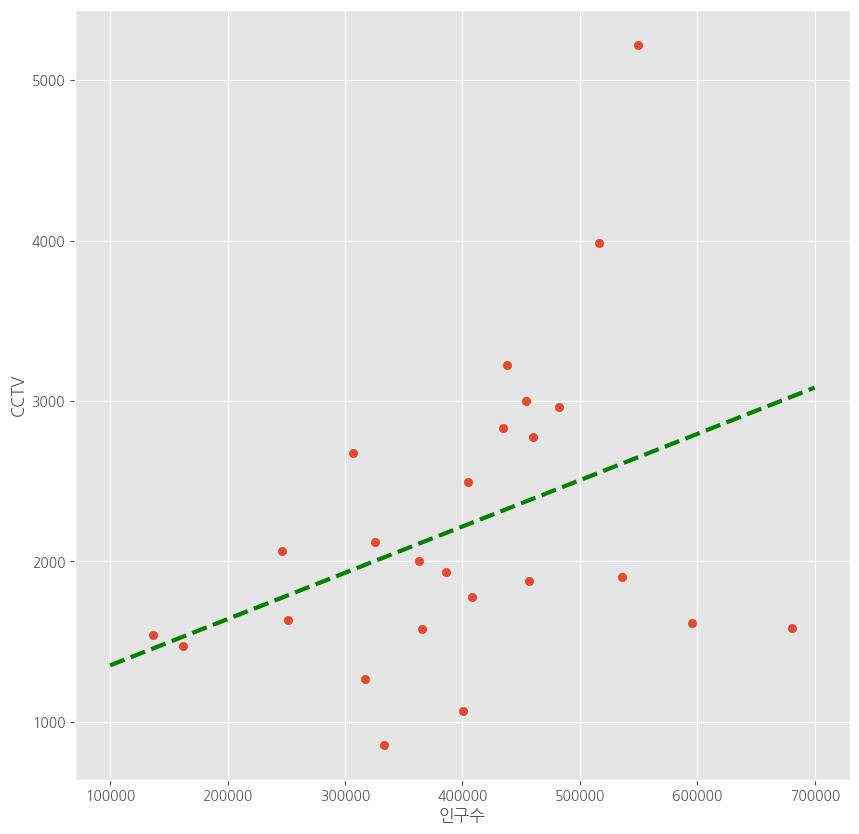

In [46]:
# 산점도를 이용한 시각화
plt.style.use('ggplot')

plt.figure(figsize = (10, 10))
plt.scatter(
    x = data_result.인구수,
    y = data_result.소계
)
plt.plot(
    fx,
    f1(fx),
    ls = 'dashed',
    lw = 3,
    color = 'green'
)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()



> 이 직선은 CCTV 댓수의 기준값이 됩니다.       
이 직선을 기준으로 상위에 있는 점은 과하게 설치된 것이고,                
직선보다 하위에 있는 점은 인구수에 비해 CCTV가 부족하는 해석

---
#### 직선과의 오차를 구하는 공식과 오차가 큰 순으로 데이터 정렬후 그래프 그리기

In [47]:
# 소계에서 기준 인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result.소계 - f1(data_result.인구수))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,0.266548,1152.085731
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237
노원구,1906,42.026826,535495,531037,4458,82682,0.832501,15.440294,0.355932,703.063456


In [48]:
# 정렬
data_sort = \
    data_result.sort_values(
        by = '오차',
        ascending=False
    )
data_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,0.949449,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,0.232933,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,0.771297,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,0.257275,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,0.271444,1165.777237


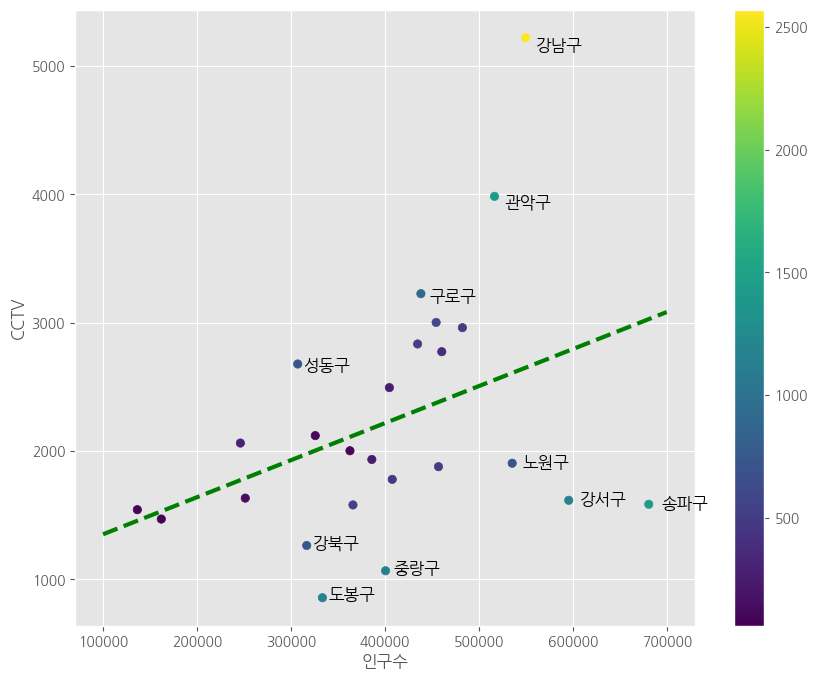

In [49]:
# 산점도를 이용한 시각화
plt.style.use('ggplot')

plt.figure(figsize = (10, 8))
plt.scatter(
    x = data_result.인구수,
    y = data_result.소계,
    c = data_result.오차 # 컬러를 값에 따라 다르게 사용.
)
plt.plot(
    fx,
    f1(fx),
    ls = 'dashed',
    lw = 3,
    color = 'green'
)

# 오차가 가장 큰 10개 구에 텍스트 붙이기
for n in range(10):
    plt.text(
        data_sort['인구수'].iloc[n] * 1.02,
        data_sort['소계'].iloc[n] * 0.98,
        data_sort.index[n],
        fontsize=12
    )


plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

